In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import os
from pycm import ConfusionMatrix
from scipy import misc
from scipy import ndimage

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as Data
import torchvision

In [4]:
if not os.path.exists('CNN_Tutorial_data/'):
    os.mkdir('CNN_Tutorial_data/')
    
if not os.path.exists('CNN_Tutorial_data/mnist/'):
    os.mkdir('CNN_Tutorial_data/mnist')
    DOWNLOAD_MNIST = True
else:
    DOWNLOAD_MNIST = False
    
data = torchvision.datasets.MNIST(root='CNN_Tutorial_data/mnist', 
                                  transform=torchvision.transforms.ToTensor(),
                                  download=DOWNLOAD_MNIST)

In [5]:
print(data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: CNN_Tutorial_data/mnist
    Split: Train
    StandardTransform
Transform: ToTensor()


In [7]:
# Atributes
print([x for x in dir(data)])

['__add__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_exists', '_format_transform_repr', '_repr_indent', 'class_to_idx', 'classes', 'data', 'download', 'extra_repr', 'processed_folder', 'raw_folder', 'resources', 'root', 'target_transform', 'targets', 'test_data', 'test_file', 'test_labels', 'train', 'train_data', 'train_labels', 'training_file', 'transform', 'transforms']


In [9]:
print(data.train_data.shape)
print(data.train_labels.shape)

torch.Size([60000, 28, 28])
torch.Size([60000])


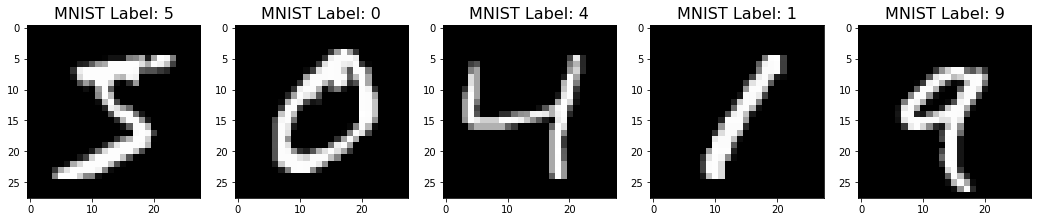

In [28]:
fig, axs = plt.subplots(1,5, figsize=(18, 5))

for i in range(len(axs)):
    axs[i].imshow(data.train_data[i], cmap='gray')
    axs[i].set_title('MNIST Label: {0}'.format(data.train_labels[i]), fontsize=16)
plt.show()

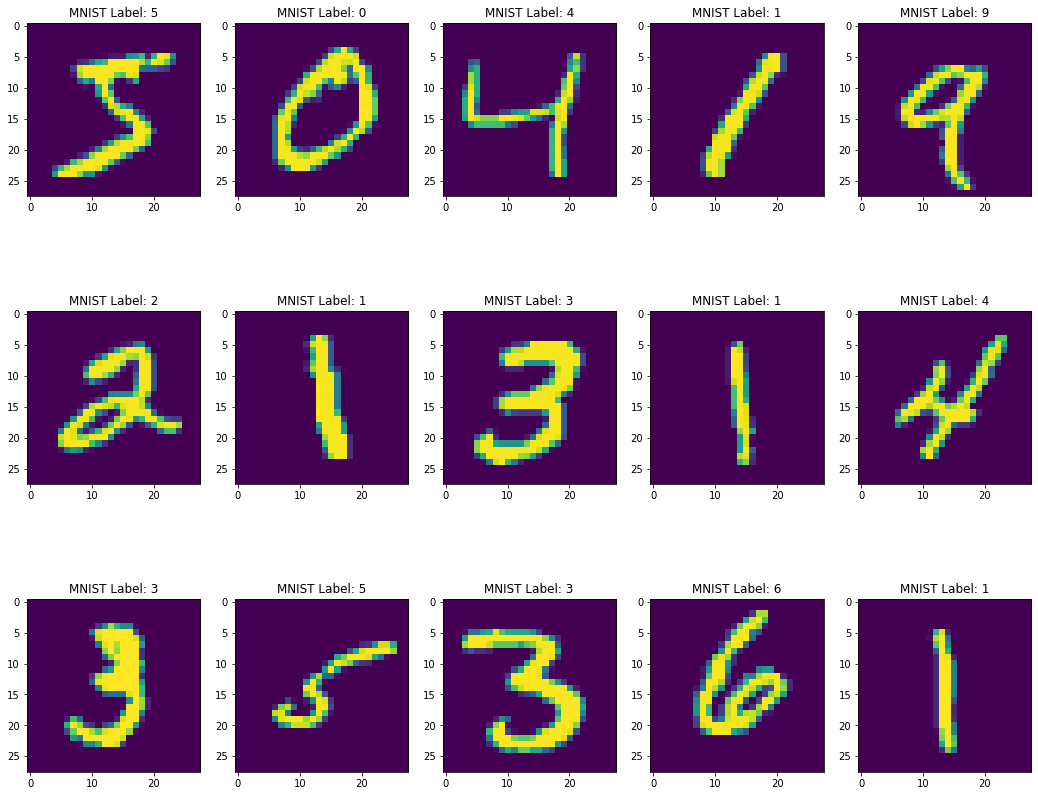

In [30]:
f, axs = plt.subplots(3,5, figsize=(18, 15))
c=0
for i in range(3):
    for j in range(5):
        axs[i,j].imshow(data.train_data[c])
        axs[i,j].set_title('MNIST Label: {0}'.format(data.train_labels[c]))
        c=c+1
plt.show()

In [32]:
#pixel values
print(data.train_data[0])

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [ ]:
#Desining a convolutional neural network